## EDA And Feature Engineering Flight Price Prediction


## Introduction:
The number of people who fly has dramatically increased in recent years. Pricing alters dynamically owing to many variables, making it difficult for airlines to maintain prices. As a result, we will attempt to solve this problem using machine learning. This can assist airlines in determining what rates they can keep. Customers can also use it to forecast future airline prices and plan their trips appropriately.


### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

## Problem statement.
This dataset comprises of Flight Price taken from Kaggle
Link of the dataset is as follows :- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh \
A user can predict the price of the Flight Fare based on input features.\
Prediction results can be useful for traveller to get suggested price

## Objective
The goal of this article is to predict flight prices based on a variety of variables. The data utilized in this post may be found on Kaggle. Because the price is the target or dependent variable, this will be a regression problem (continuous numeric value).

## Process

1. EDA: Learn the complete process of EDA
2. Data analysis: Learn to withdraw some insights from the dataset both mathematically and visualize it.
3. Data visualization: Visualising the data to get better insight from it.
4. Feature engineering: We will also see what kind of stuff we can do in the feature engineering part.

In [1]:
## Let’s start by importing the libraries:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing the dataset:
## Use pandas.read_excel to read the data as data is in excel form.

df=pd.read_excel('flight_price.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
## dimensions
df.shape

(10683, 11)

Observation:

Number of rows = 10683\
Number of columns = 11

In [6]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Number of variables = 11
- Number of rows = 10683
- Number of categorical type of feature = 10
- Number of numerical type of feature = 1

In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#checking for null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
## Data Preprocessing

## We are going to extract the date and month from the date of the journey and we dropped it.
df['Dat_of_Journey'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month_of_Journey'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year_of_Journey'] = df['Date_of_Journey'].str.split('/').str[2]

df['Dat_of_Journey'] = df['Dat_of_Journey'].astype(int)
df['Month_of_Journey'] = df['Month_of_Journey'].astype(int)
df['Year_of_Journey'] = df['Year_of_Journey'].astype(int)

df = df.drop(['Date_of_Journey'], axis=1)

## Arrival time is when a plane leaves.
## Similar to “Date_of_Journey” we can extract values from “Arrival_Time”.
df['Arrival_Hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

df.drop(['Arrival_Time'], axis=1, inplace=True)

df['Arrival_Hours'] = df['Arrival_Hours'].astype(int)
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype(int)

## Departure time is when a plane leaves the gate.
## Similar to “Date_of_Journey” we can extract values from “Dep_Time”
df['Dept_Hours'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_Minutes'] = df['Dep_Time'].str.split(':').str[1]

df['Dept_Hours'] = df['Dept_Hours'].astype(int)
df['Dept_Minutes'] = df['Dept_Minutes'].astype(int)

df.drop(['Dep_Time'], axis=1, inplace=True)

# Assigning and converting Duration column into list
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df.drop(['Duration'],axis=1,inplace=True)

df['Total_Stops'].unique()

## Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. 
## We split the data in route column, and store all the city names in separate columns –
df.Route = df.Route.str.split('→')
df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

## We drop some columns like 'city4', 'city6' and 'city5', since majority of the data in these columns was NaN(null).
df.drop(['City5'],axis=1,inplace=True)
df.drop(['City6'],axis=1,inplace=True)
df.drop(['City4'],axis=1,inplace=True)

## We replace City 1 in this missing values row as 'DEL' and 'City2' as COK
df.loc[9039, 'City1'] = 'DEL'
df.loc[9039, 'City2'] = 'COK'

## replace 'NaN' values in 'City3' with 'None', since rows where 'City3' is missing did not have any stop, just the source and the destination
df['City3'].fillna('None', inplace=True)

## for nan values
df['Total_Stops'].mode()

df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

## Trying to find out unique values in column Airline, Destination and Soure categories and counts the unique values as well.
df['Airline'].unique()
df['Destination'].unique()
df['Source'].unique()

## Handling Categorical Data:
## Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data. 
## Let’s handle each one by one.

## Nominal data → are not in any order → OneHotEncoder is used in this case
## Ordinal data → are in order → LabelEncoder is used in this case

## ohe for multiple variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray()
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray(), columns=encoder.get_feature_names_out())

df = pd.concat([df, encoded_df], axis=1)

# df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

df['Additional_Info'].unique()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['Additional_Info'])
df['Encoded_Additional_Info'] = pd.DataFrame(encoder.fit_transform(df['Additional_Info']))

In [11]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dat_of_Journey,Month_of_Journey,Year_of_Journey,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Encoded_Additional_Info
0,IndiGo,Banglore,New Delhi,"[BLR , DEL]",0,No info,3897,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
1,Air India,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",2,No info,7662,1,5,2019,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
2,Jet Airways,Delhi,Cochin,"[DEL , LKO , BOM , COK]",2,No info,13882,9,6,2019,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8
3,IndiGo,Kolkata,Banglore,"[CCU , NAG , BLR]",1,No info,6218,12,5,2019,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8
4,IndiGo,Banglore,New Delhi,"[BLR , NAG , DEL]",1,No info,13302,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8


Observations:
    
We could say that Jet Airways has occurred maximum numbers of times followed by IndiGo and Air India.

## Visualizations

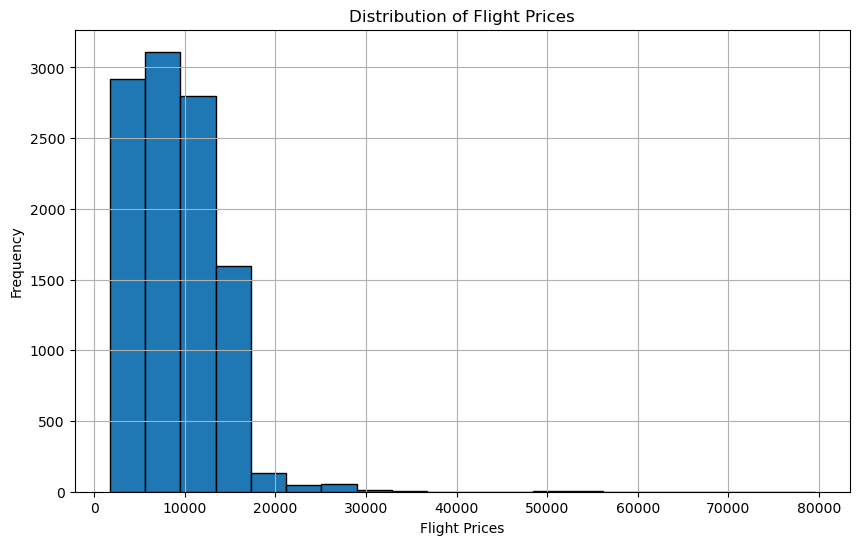

In [12]:
## distribution of flight prices in the dataset
## Creating histogram
plt.figure(figsize=(10, 6))
plt.hist(x=df['Price'], bins=20, ec='black')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid()
plt.show()

Observations:

- The price column contains the minimum value as 1759 and maximum value as 79512.
- Majority of the flights have price range between 1759–20k.
- Number of flights having prices greater than 20k are quite less.
- Price range is skewed towards right.

In [13]:
## range of prices in the dataset

In [14]:
# Calculate the range, minimum, and maximum prices
price_range = df['Price'].max() - df['Price'].min()
minimum_price = df['Price'].min()
maximum_price = df['Price'].max()

# Display the results
print(f"Range of Prices: {price_range}")
print(f"Minimum Price: {minimum_price}")
print(f"Maximum Price: {maximum_price}")

Range of Prices: 77753
Minimum Price: 1759
Maximum Price: 79512


In [15]:
## price of flights vary by airline

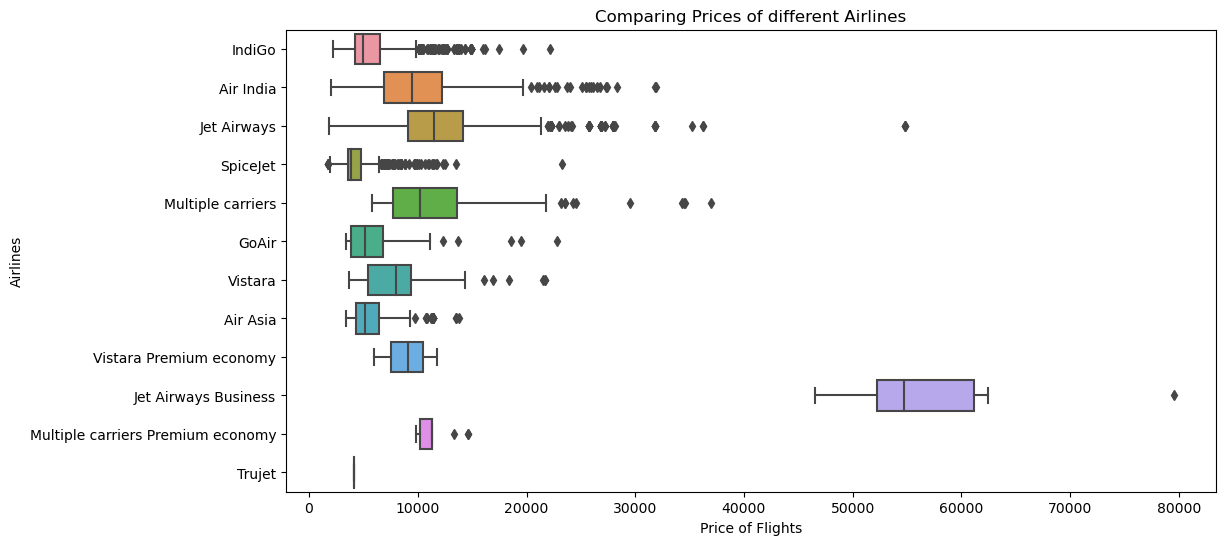

In [16]:
import seaborn as sns

# creating boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,y='Airline', x='Price')
plt.ylabel('Airlines')
plt.xlabel('Price of Flights')
plt.title('Comparing Prices of different Airlines')
plt.show()

Observations:

- All Airlines dataset has outliers
- From graph we can see that Jet Airways Business have the highest Price.
- The cost of other carriers varies as well.

In [17]:
## Creating BoxPlot to find outliers in the dataset and how they can impact the analysis

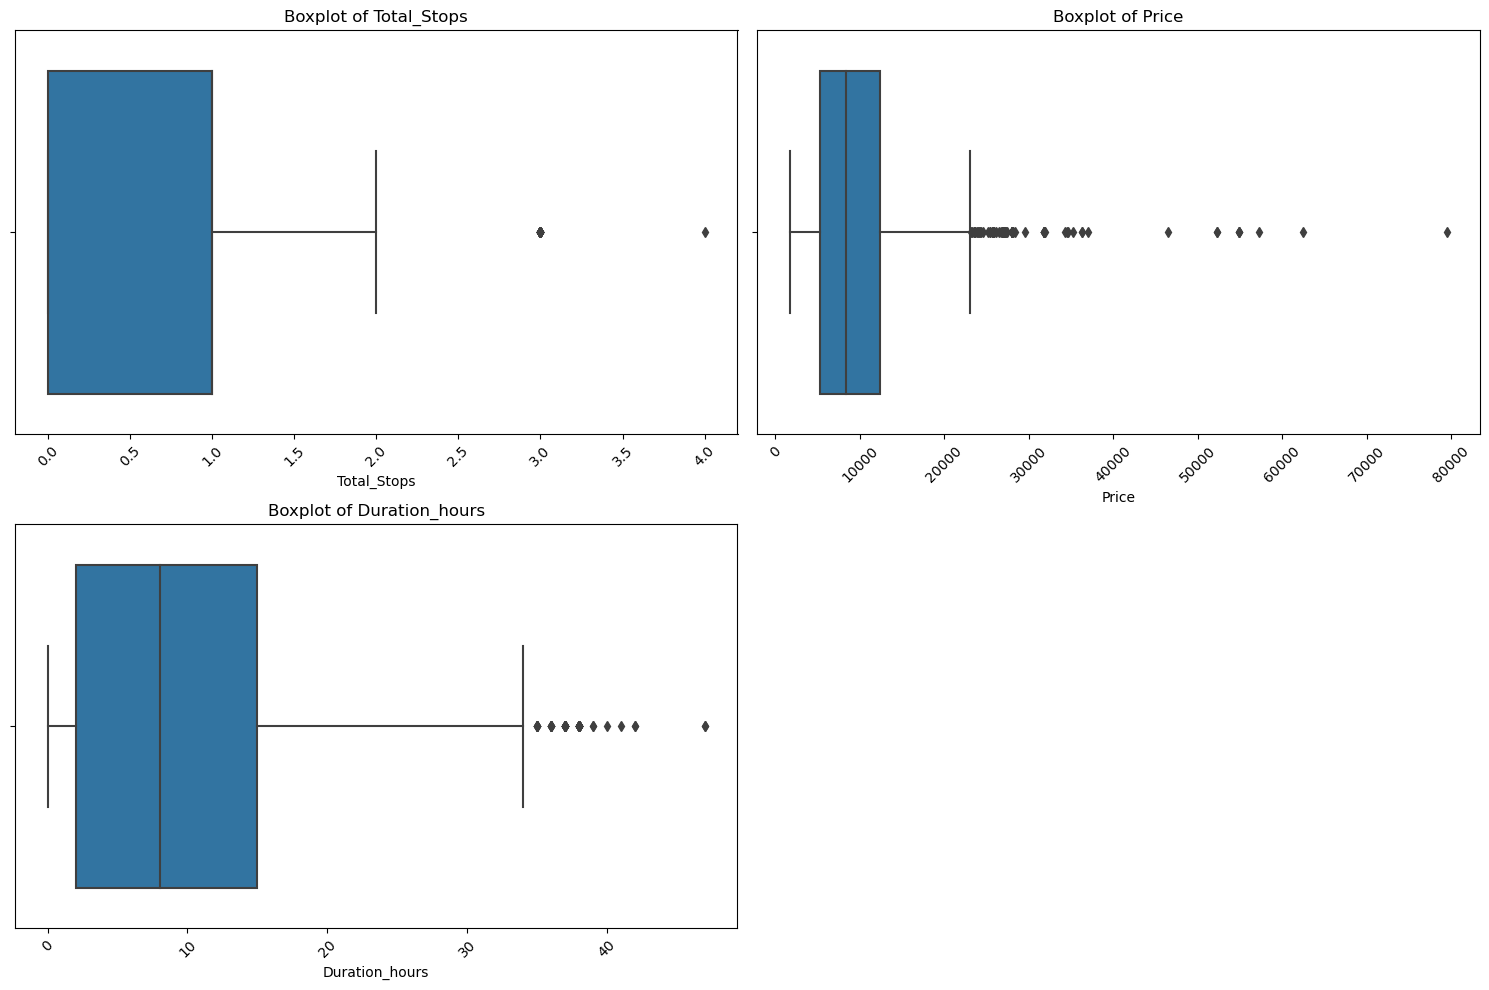

In [18]:
features_to_plot = ['Total_Stops', 'Price', 'Duration_hours']

# Calculate subplot layout
num_features = len(features_to_plot)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots with boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

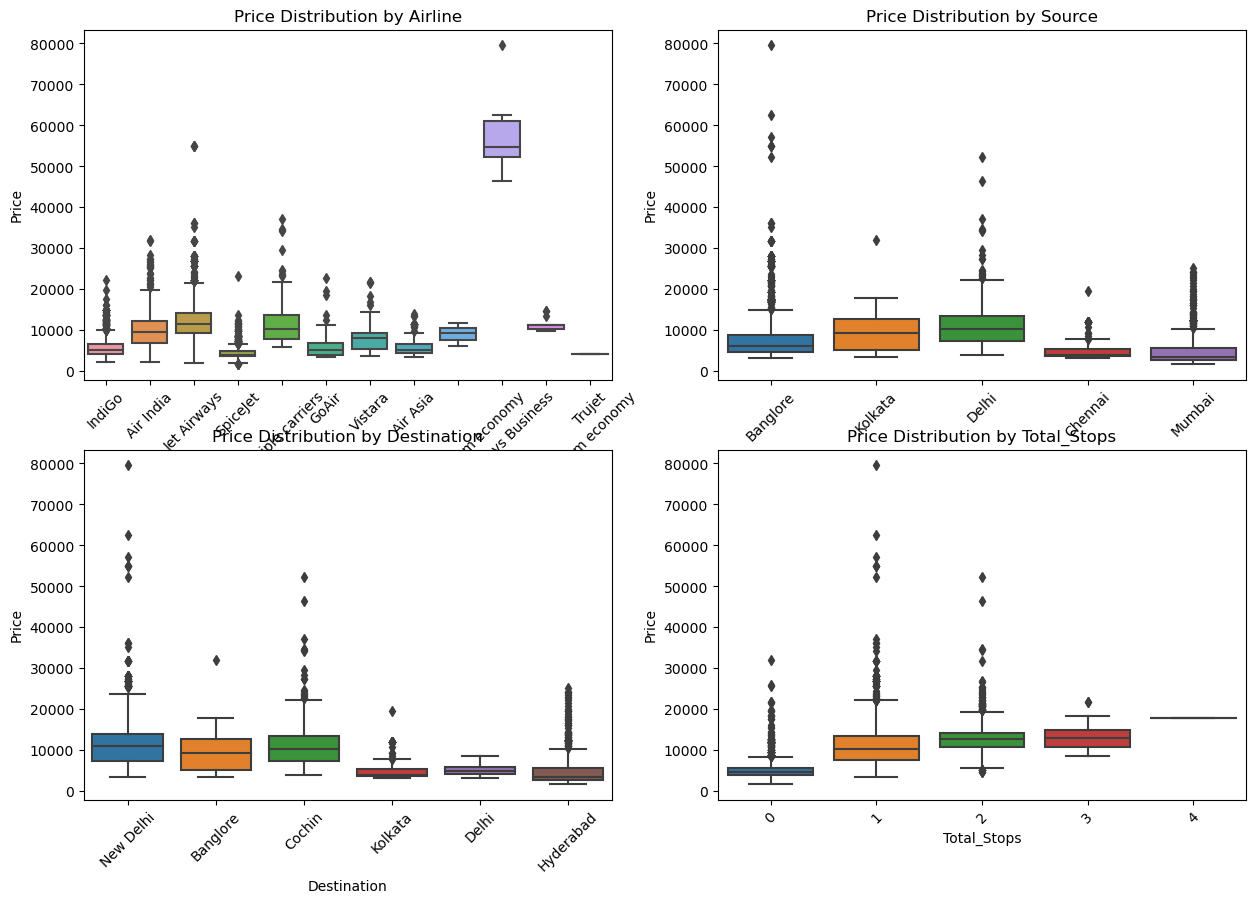

In [19]:
features_to_plot = ['Airline', 'Source', 'Destination', 'Total_Stops']

# Set up subplots
num_features = len(features_to_plot)
num_cols = 2  # Number of columns for subplots
num_rows = (num_features + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate through features and create boxplots
for idx, feature in enumerate(features_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    sns.boxplot(x=feature, y='Price', data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Price Distribution by {feature}')

1. Outliers in Price:
Outliers in the price feature can skew the distribution of flight prices, leading to inaccurate insights about the central tendency and variability of flight costs. This could misrepresent the typical price range and potentially lead to incorrect assumptions about the affordability of flights.

2. Outliers in Total Stops:
Outliers in the total stops feature could indicate extreme cases where flights have an unusually high or low number of stops. These outliers might represent special situations, such as rare direct flights or multi-leg journeys. However, if these cases are not properly understood and contextualized, they might lead to misleading conclusions about the prevalence of certain types of flights, potentially affecting route planning and customer expectations.

3. Outliers in Duration Hours:
Outliers in the duration hours feature could indicate flights with exceptionally long or short durations. Understanding the reasons behind these outliers is crucial. Extremely long flights might be related to long-haul journeys, while extremely short durations could be due to data entry issues or mistakes. These outliers could distort insights about typical flight durations and impact the accuracy of flight duration predictions.

4. Bivariate Outliers (e.g., Price with Airline, Source, Destination, Total Stops):
Outliers in bivariate relationships, such as price with airline, source, destination, or total stops, could suggest cases where the relationship between the two variables is uncommon or unique. These cases might indicate premium services, special routes, or unique travel situations. Failing to account for these outliers might lead to biased conclusions about the influence of these variables on flight prices. For example, an outlier indicating high-priced flights for a specific airline might not be representative of the overall pricing trend.

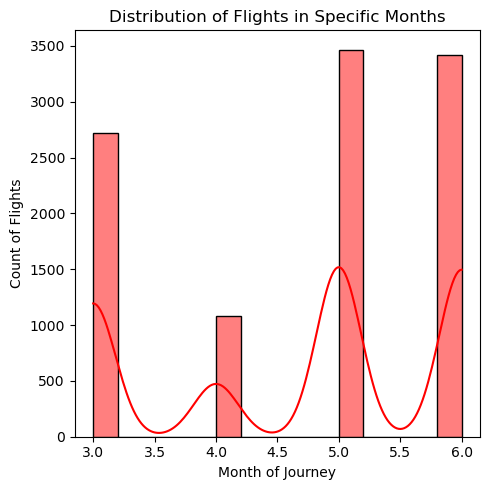

In [20]:
## This visualization will show you the distribution of flight counts across different months, 
## indicating months with higher travel demand
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Month_of_Journey', color='r', kde=True)
plt.xlabel('Month of Journey')
plt.ylabel('Count of Flights')
plt.title('Distribution of Flights in Specific Months')
plt.tight_layout()
plt.show()

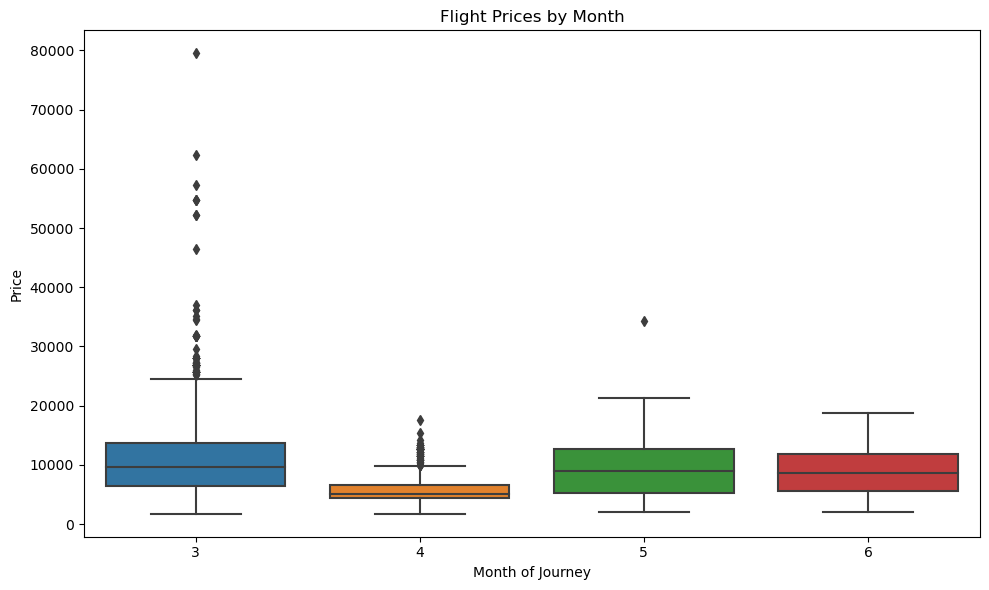

In [21]:
## A box plot will help see the spread of flight prices across different months and identify any potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month_of_Journey', y='Price', data=df)
plt.xlabel('Month of Journey')
plt.ylabel('Price')
plt.title('Flight Prices by Month')
plt.tight_layout()
plt.show()

Observations:

1. Higher Flight Counts: The hist plot of flight counts by month shows a clear peak in May and June. This suggests that more people tend to travel during these months, possibly due to various reasons such as vacations, holidays, or favorable weather conditions.

2. Stable Price Range: The box plot of flight prices by month reveals that these peak months (May and June) have relatively lower price variability. The absence or minimal presence of outliers indicates that the flight prices during these months tend to be relatively consistent, possibly due to high demand keeping prices within a certain range.

Features to be Considered for Trends:
- Month_of_Journey: This feature can be used to analyze trends in flight prices based on the month of travel.
- Dat_of_Journey: The day of the journey might exhibit trends based on day of the week or proximity to holidays.
- Analyzing the distribution of flight prices in relation to the count of flights 

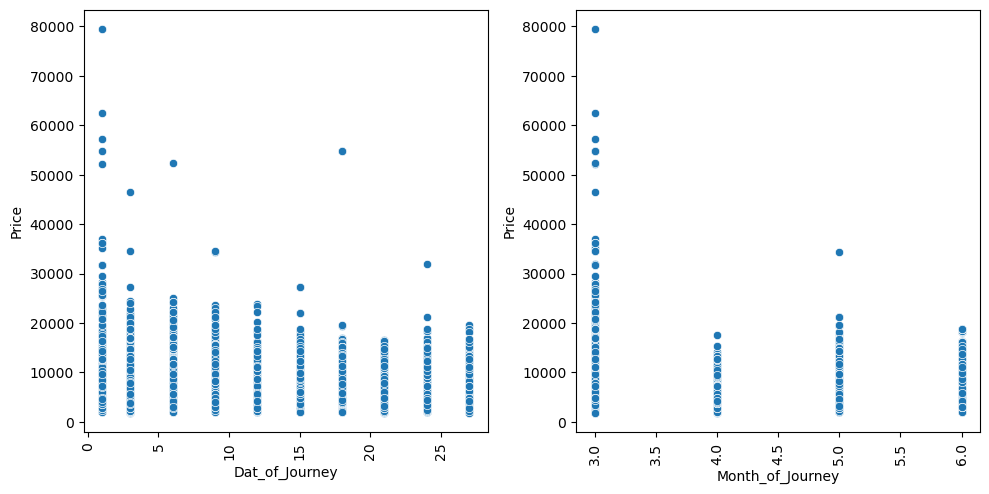

In [22]:
numerical_features = ['Dat_of_Journey', 'Month_of_Journey']

## checking the relation of 'Price' column with numerical data –
c=1
plt.figure(figsize=(10, 5))
for i in numerical_features:
    plt.subplot(1,2,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.tight_layout()
    plt.xticks(rotation=90)
    c=c+1
plt.show()

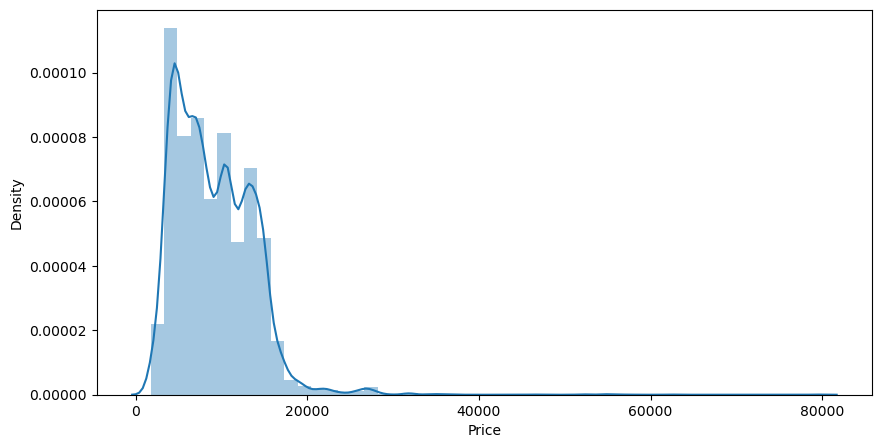

In [25]:
## Distibution of 'Price' column
plt.figure(figsize=(10,5))
sns.distplot(df.Price)
plt.show()

The trend insights summarized:

- High price flights are lesser during the end of the month, indicating a possible trend of reduced demand or more cost-conscious travelers as the month approaches its conclusion.

- Prices are higher in the month of March, suggesting a potential seasonal trend where flight prices experience an increase during this specific month, possibly due to spring breaks, holidays, or other events.

- Analyzing the distribution of flight prices in relation to the count of flights can help identify common price ranges and the frequency of those prices, highlighting trends in how prices are distributed among different ranges.
1. Flight prices exhibit a wide range, spanning from 1759 to 79512, indicating significant variability in ticket costs.
2. The majority of flights fall within the price range of 1759–20k, suggesting a common preference for affordable ticket options.
3. A relatively low number of flights have prices exceeding 20k, indicating a trend of limited demand or select offerings for higher-priced flights.
4. The right-skewed price distribution implies that while most flights are within the lower and middle price range, a smaller number of flights have much higher prices, contributing to the elongated tail on the higher end of the price spectrum.

## "Effect of factors on flight prices" involves examining how specific features of flights impact their prices. 

Features to be Considered for Effects:
- Airline: This feature can be analyzed to understand how different airlines impact flight prices.
- Source: Analyzing the source location's effect on flight prices.
- Destination: Similar to 'Source', this feature could affect flight prices.
- Route (City1, City2, City3): The specific flight route could influence prices due to distance and popularity.
- Total_Stops: Understanding the effect of the number of stops on flight prices.
- Additional_Info: Analyzing if additional information provided impacts pricing.
- Dat_of_Journey and Month_of_Jouney: These date-related features might affect pricing trends based on flight times.
- Duration_hours, Duration_mins: Understanding how flight duration influences prices.

In [27]:
## comparing the independent features with 'Price' column, to check the impact on ‘Price’
## separate categorical and numerical features to compare their trends with flight prices
categorical_features = ['Airline', 'Source', 'Destination', 'Additional_Info']
numerical_features = ['Total_Stops', 'Dat_of_Journey', 'Month_of_Journey',
      'Duration_hours', 'Duration_mins']

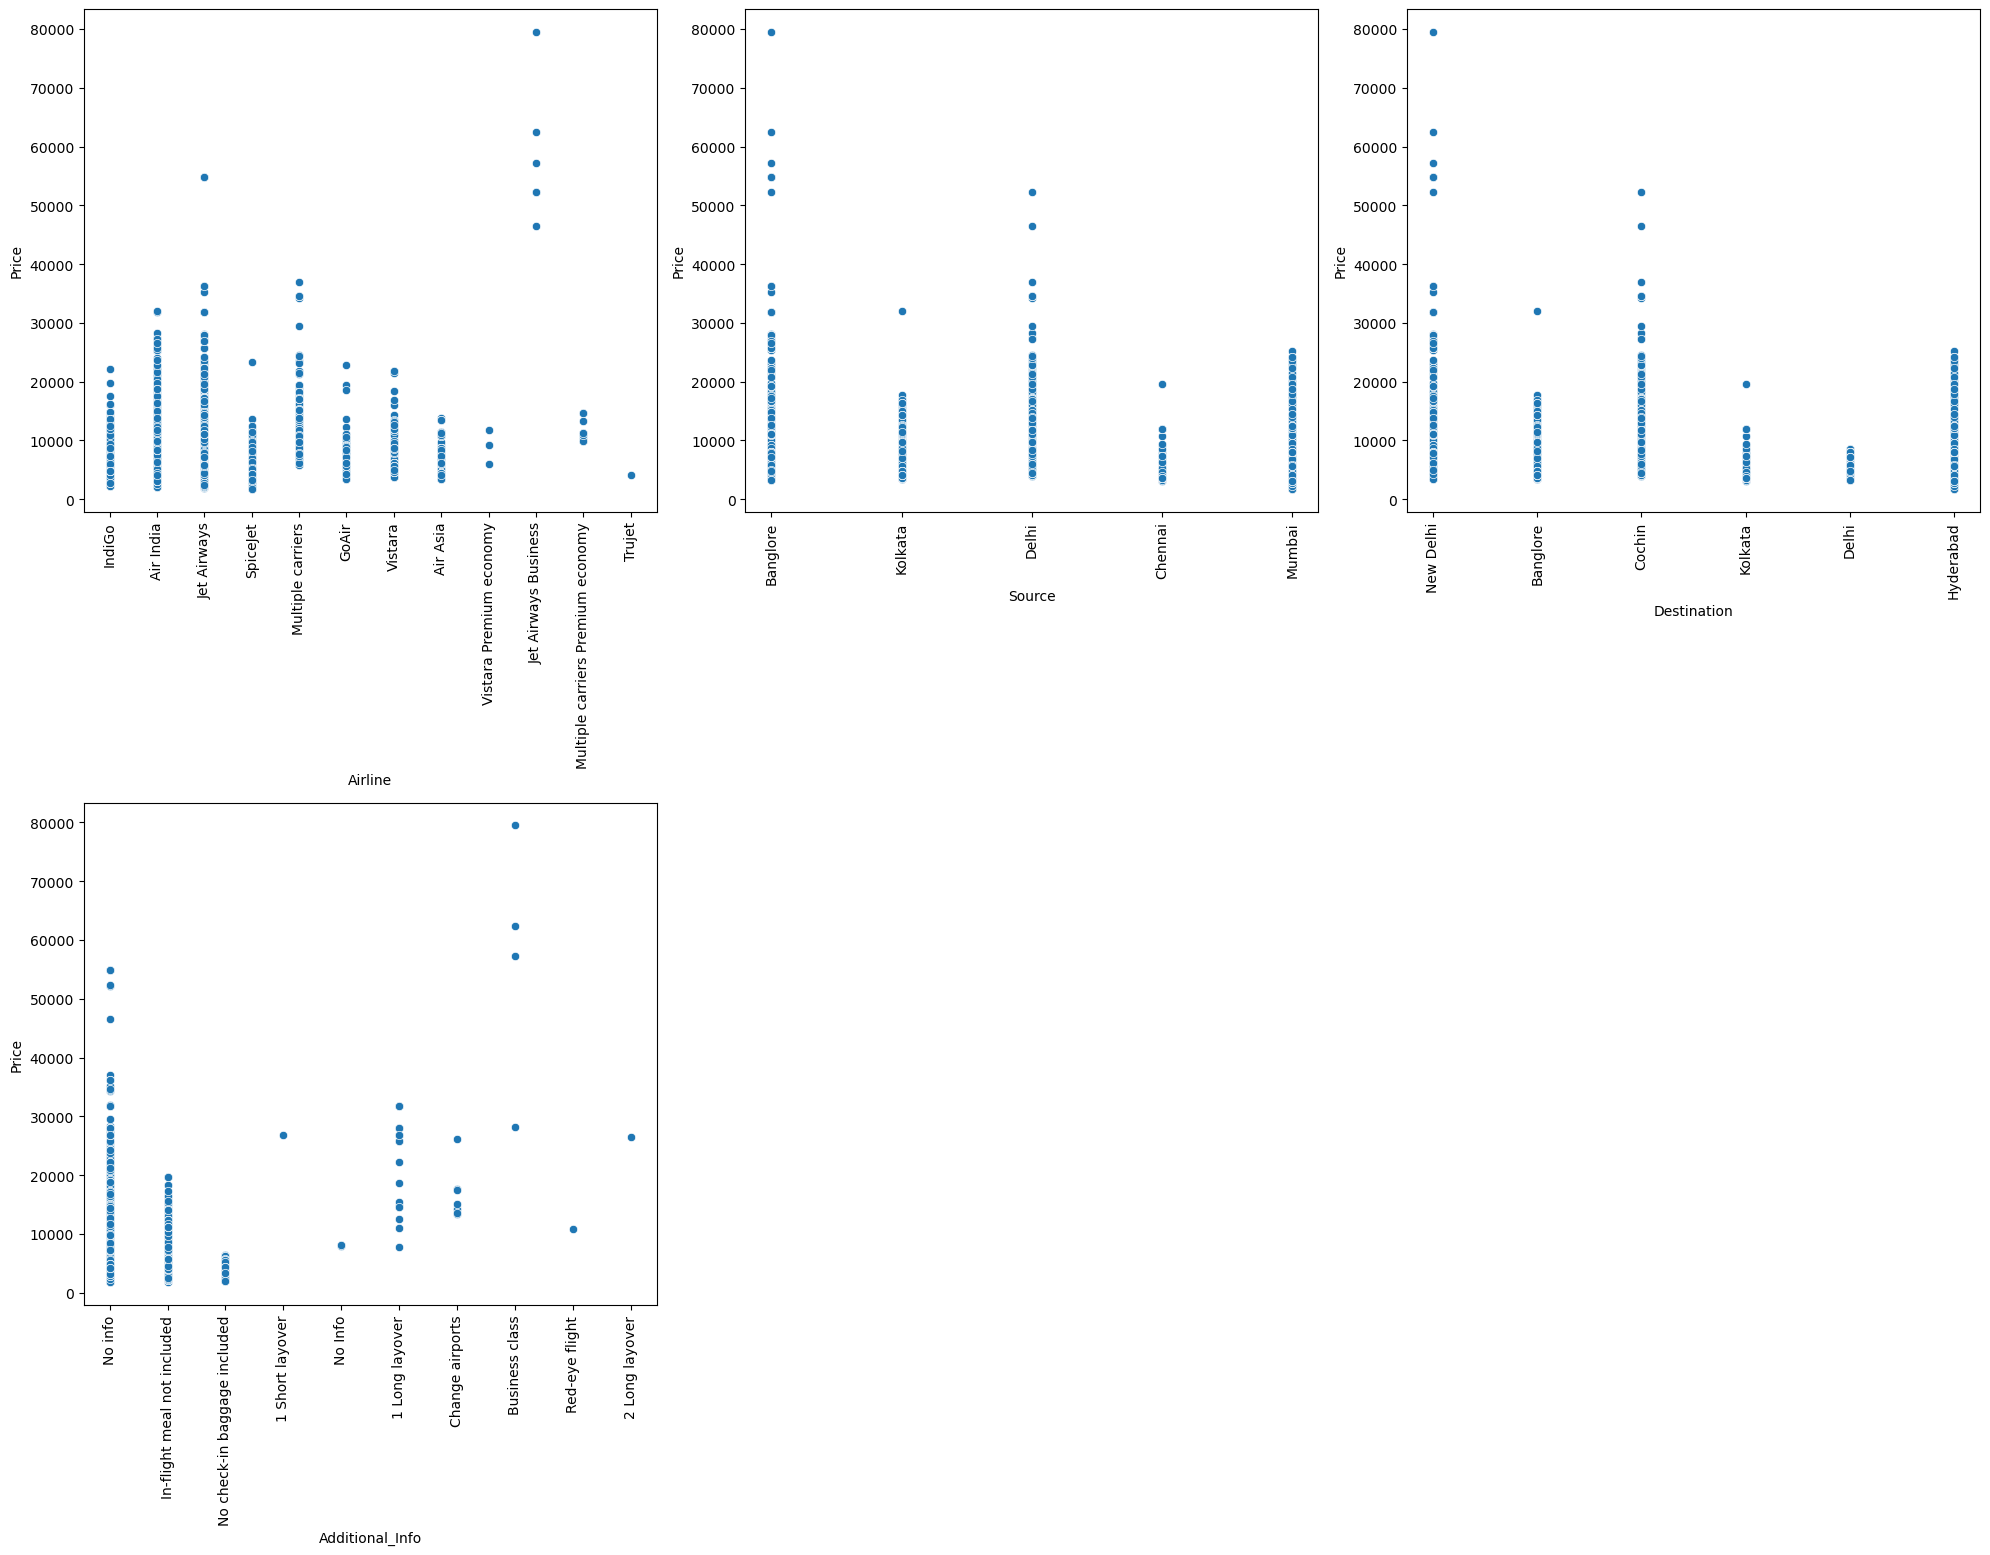

In [28]:
## checking the effect on price with categorical values
c=1
plt.figure(figsize=(20, 45))
for i in categorical_features:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.tight_layout()
    plt.xticks(rotation=90)
    c=c+1
plt.show()

Observations:

1. Jet Airways business class flights are priced highest in the range of 50k – 80k, indicating a premium pricing strategy for this class.
2. All flights with high costs depart from Bangalore, while flights from other departure locations fall within the price range of 3k – 50k, suggesting Bangalore departures correlate with higher prices.
3. All flights with high costs have Delhi as their destination, while flights with other destinations fall within the price range of 3k – 50k, suggesting that flights to Delhi command premium pricing.
4. Business class flights are consistently associated with higher prices, indicating a clear relationship between the class of service and ticket cost.

In [29]:
## We have quite less data where prices are higher than 50k. We check these rows once –

In [30]:
selected_columns = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Dat_of_Journey', 'Month_of_Journey', 'Arrival_Hours', 'Arrival_Minutes', 'Dept_Hours',
       'Dept_Minutes', 'Duration_hours', 'Duration_mins']

new_df = df[selected_columns]

In [31]:
new_df[new_df.Price>50000]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dat_of_Journey,Month_of_Journey,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,"[BLR , BOM , DEL]",1,No info,52229,1,3,10,45,5,45,5,0
1478,Jet Airways,Banglore,New Delhi,"[BLR , BOM , DEL]",1,No info,54826,18,3,0,45,18,40,6,5
2618,Jet Airways,Banglore,New Delhi,"[BLR , BOM , DEL]",1,No info,54826,18,3,5,5,22,50,6,15
2924,Jet Airways Business,Banglore,New Delhi,"[BLR , BOM , DEL]",1,Business class,79512,1,3,11,25,5,45,5,40
5372,Jet Airways Business,Banglore,New Delhi,"[BLR , BOM , DEL]",1,Business class,62427,1,3,12,25,5,45,6,40
5439,Jet Airways,Banglore,New Delhi,"[BLR , BOM , DEL]",1,No info,54826,1,3,23,0,16,55,6,5
9715,Jet Airways Business,Delhi,Cochin,"[DEL , ATQ , BOM , COK]",2,No info,52285,6,3,4,25,20,5,8,20
10364,Jet Airways Business,Banglore,New Delhi,"[BLR , MAA , DEL]",1,Business class,57209,1,3,14,25,9,45,4,40


Observations from Price>50000:

1. A total of 8 flights are characterized by high prices, suggesting a distinctive segment of premium-priced options.
2. Most of these flights follow the route BLR->BOM->DEL, indicating a specific high-cost itinerary pattern.
3. Business class predominates among these flights, implying a preference for luxurious travel options.
4. All flights within this subset are operated by Jet Airways, suggesting a unique pricing strategy for this airline.
5. The flights with high prices are exclusively from March departures, indicating a temporal concentration of premium-priced offerings.

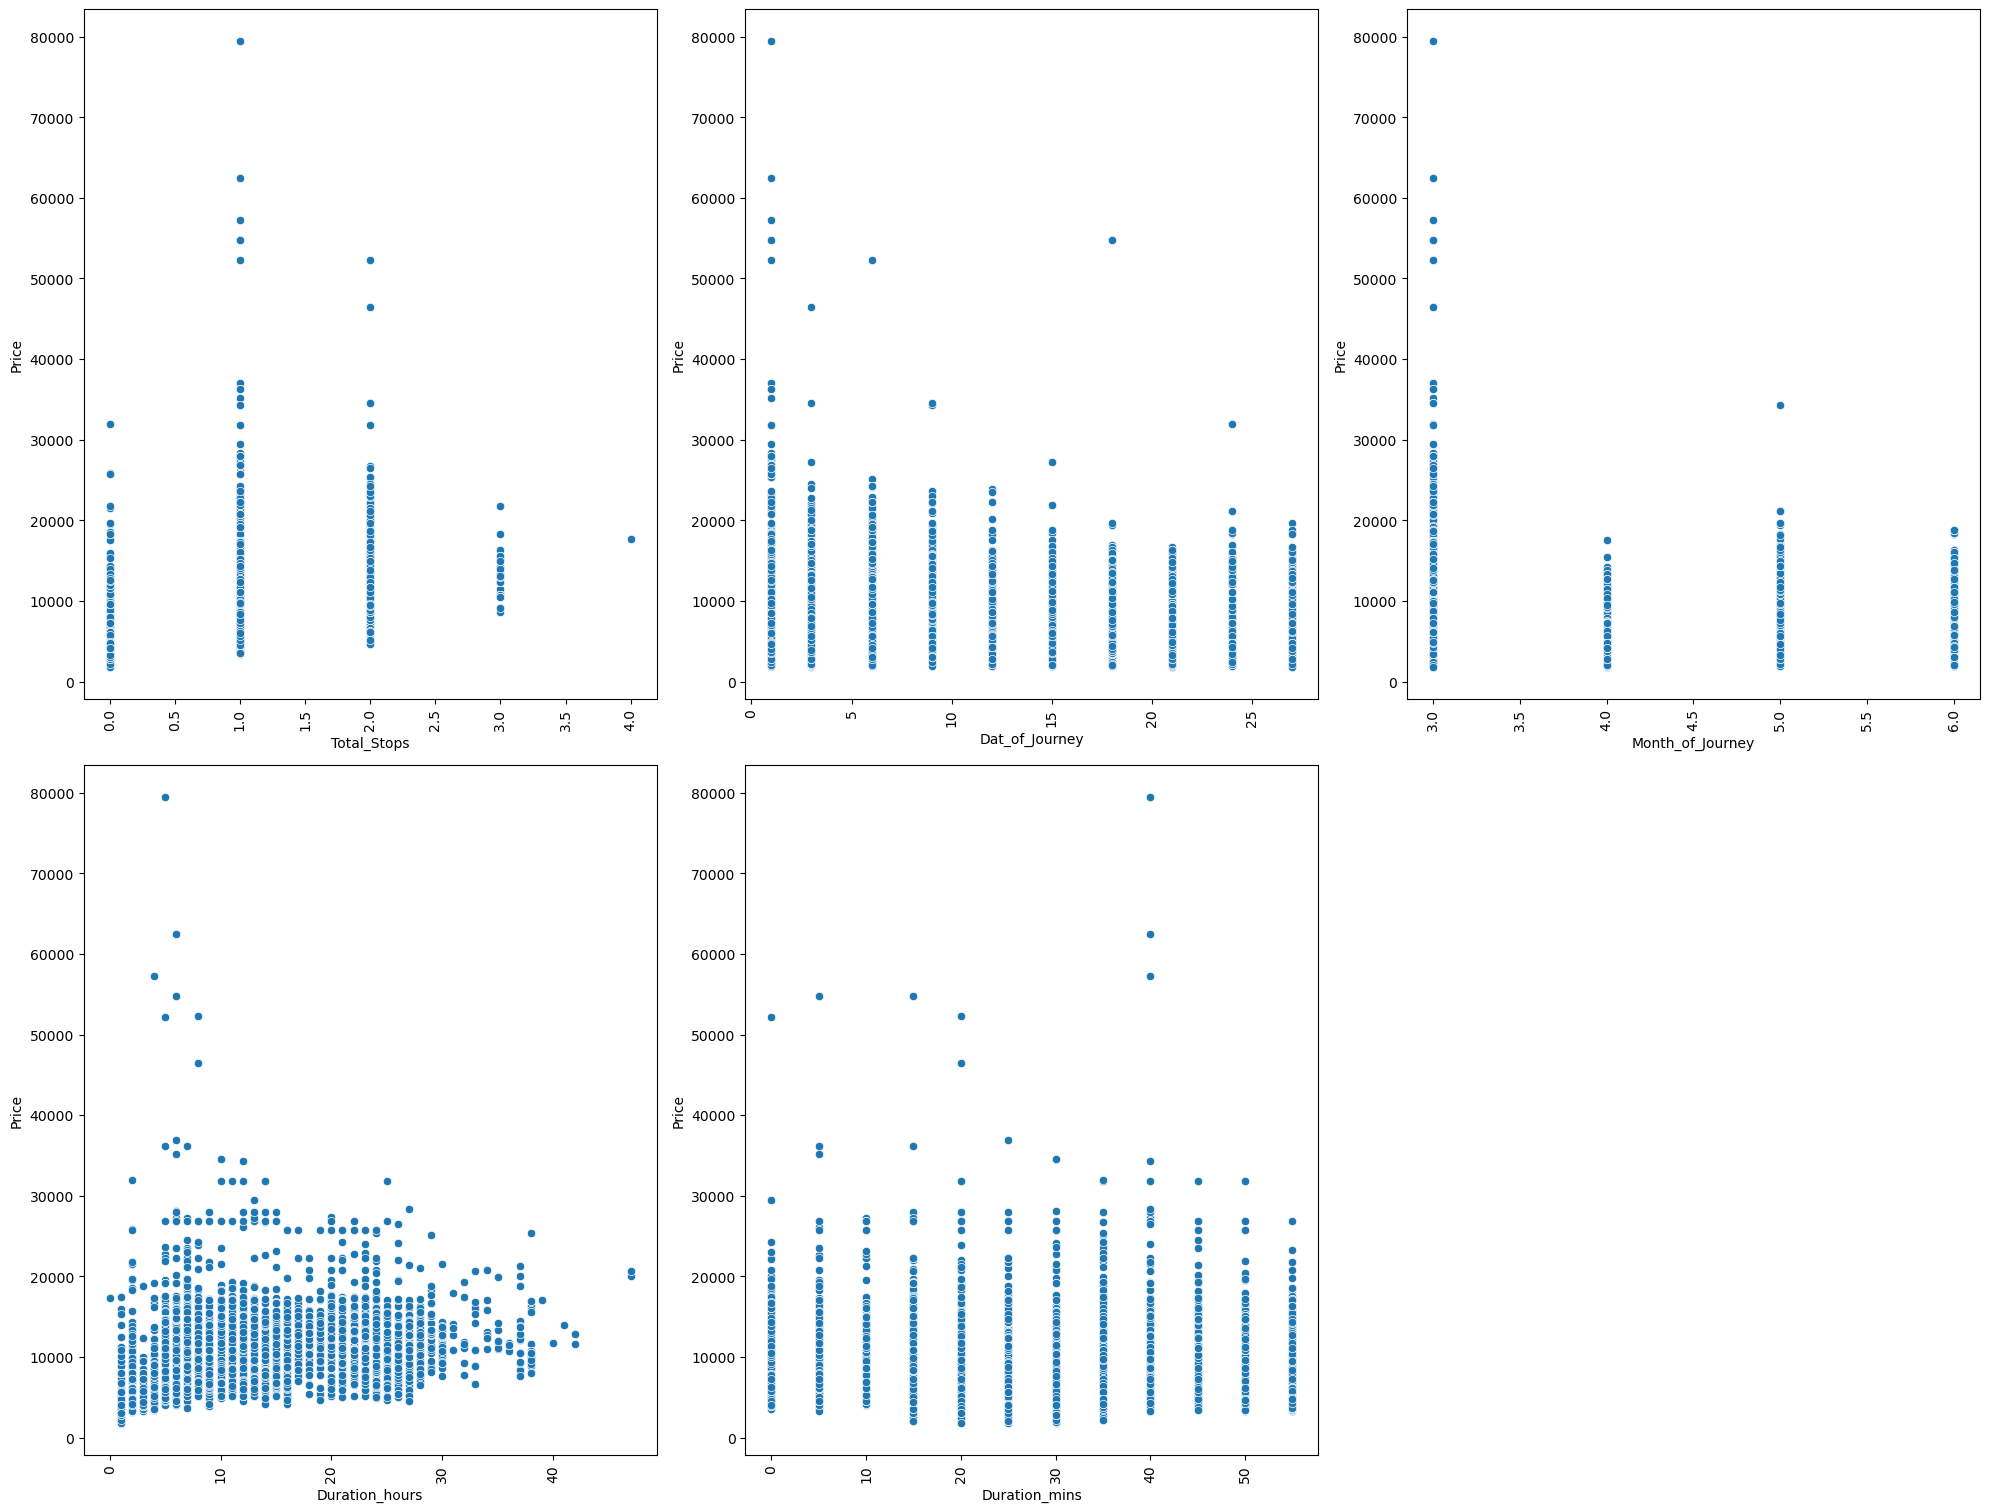

In [32]:
## checking the relation of 'Price' column with numerical data –
c=1
plt.figure(figsize=(20, 45))
for i in numerical_features:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i], y=df.Price)
    plt.tight_layout()
    plt.xticks(rotation=90)
    c=c+1
plt.show()

Observations:
    
1. An increase in the number of stops correlates with a narrower price range of 10k – 22k, indicating a potential pricing pattern based on flight complexity.
2. High-priced flights are less common towards the end of the month, suggesting a possible trend of lower demand or more cost-conscious travelers.
3. Prices exhibit an upward trend in March, implying a seasonal effect that leads to higher flight costs during this specific month.
4. Longer travel hours correspond to higher prices, alongside a decrease in the number of flights available, highlighting the interplay between flight duration and pricing.

## Report

- Jet Airways has highest customer footfall followed by Indigo and Air India .
- Jet Airways has a market Share of 36.03 % followed by Indigo which has a market share of 19.22 % and Air India Which has market share of 16.40 % .
- Delhi has the highest footfall for source and Cochin has the highest footfall for Destination 